In [1]:
# pip install transformers -i https://pypi.tuna.tsinghua.edu.cn/simple

In [7]:
from transformers import pipeline #使用HuggingFace中的GPT2模型，进行文本生成的任务
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
model_name = "gpt2"
llm = pipeline("text-generation", model=model_name)

In [9]:
class UAVSimulator:
    def __init__(self):
        self.is_flying = False
        self.position = [0, 0, 0]

    def takeoff(self):
        if not self.is_flying:
            self.is_flying = True
            self.position[2] = 10
            return "UAV has taken off and is at an altitude of 10 meters."
        return "UAV is already in the air."

    def land(self):
        if self.is_flying:
            self.is_flying = False
            self.position[2] = 0
            return "UAV has landed safely."
        return "UAV is already on the ground."

    def move(self, direction, distance):
        if not self.is_flying:
            return "UAV is on the ground. Take off first to move."
        
        direction_map = {
            'forward': (1, 0, 0),
            'backward': (-1, 0, 0),
            'left': (0, -1, 0),
            'right': (0, 1, 0),
            'up': (0, 0, 1),
            'down': (0, 0, -1)
        }

        if direction in direction_map:
            self.position = [
                self.position[i] + direction_map[direction][i] * distance
                for i in range(3)
            ]
            return f"UAV moved {direction} by {distance} meters."
        return f"Unknown direction '{direction}'."

    def get_status(self):
        return f"UAV status: {'Flying' if self.is_flying else 'On ground'}, Position: {self.position}"

In [10]:
#使用 GPT-2 模型解析输入命令，模拟 LLM 的指令解析，并返回适当的操作类型。
def parse_command(input_text):
    result = llm(input_text, max_length=50, num_return_sequences=1)
    generated_text = result[0]["generated_text"]
    print(f"LLM Output: {generated_text}")
    
    if "take off" in generated_text.lower():
        return "takeoff", None, None
    elif "land" in generated_text.lower():
        return "land", None, None
    elif "move" in generated_text.lower():
        for direction in ['forward', 'backward', 'left', 'right', 'up', 'down']:
            if direction in generated_text.lower():
                words = generated_text.lower().split()
                for i in range(len(words)):
                    if words[i] == direction:
                        try:
                            distance = int(words[i + 2])
                            return "move", direction, distance
                        except:
                            return "move", direction, 1
    return None, None, None

In [11]:
# 绘制无人机位置
def plot_drone(position):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([-20, 20])
    ax.set_ylim([-20, 20])
    ax.set_zlim([0, 20])

    vertices = [
        [1, -1, -1], [1, 1, -1], [-1, 1, -1], [-1, -1, -1],
        [1, -1, 1], [1, 1, 1], [-1, -1, 1], [-1, 1, 1]
    ]
    
    vertices = [[v[0] + position[0], v[1] + position[1], v[2] + position[2]] for v in vertices]

    edges = [
        (0, 1), (1, 2), (2, 3), (3, 0),
        (4, 5), (5, 7), (7, 6), (6, 4),
        (0, 4), (1, 5), (2, 7), (3, 6)
    ]

    for edge in edges:
        x = [vertices[edge[0]][0], vertices[edge[1]][0]]
        y = [vertices[edge[0]][1], vertices[edge[1]][1]]
        z = [vertices[edge[0]][2], vertices[edge[1]][2]]
        ax.plot(x, y, z, color="b")

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    ax.scatter(position[0], position[1], position[2], color='r', s=100)
    
    plt.pause(0.5)
    plt.clf()


Welcome to the UAV Simulator!
UAV status: On ground, Position: [0, 0, 0]


Enter command for the UAV:  take off


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


LLM Output: take off the glasses. We've even made a little extra noise.

When I was a child – you know, the year before I had to have a car on all my days. I would get in a truck and drive my family around
UAV has taken off and is at an altitude of 10 meters.


<Figure size 640x480 with 0 Axes>

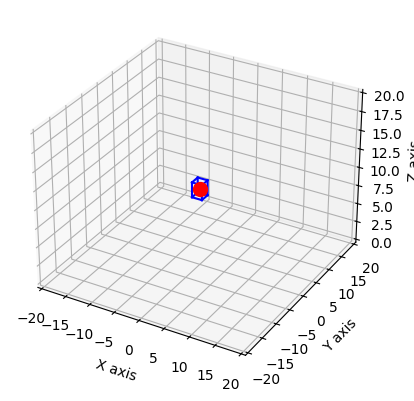

UAV status: Flying, Position: [0, 0, 10]


Enter command for the UAV:  land


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


LLM Output: land of the future: the state, government and the people. But the future has the potential to be much different by way of some of the most advanced technologies on the planet.

I am not the first scientist to believe, or even to
UAV has landed safely.


<Figure size 640x480 with 0 Axes>

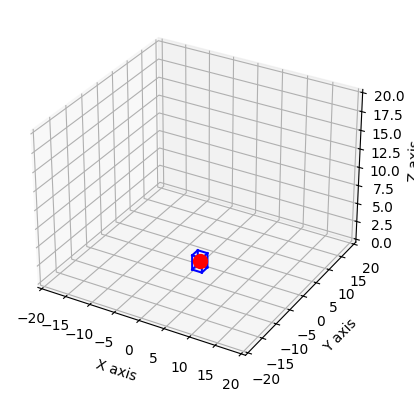

UAV status: On ground, Position: [0, 0, 0]


In [ ]:
# 主程序
def main():
    UAV = UAVSimulator()
    print("Welcome to the UAV Simulator!")
    print(UAV.get_status())

    plt.ion()
    fig = plt.figure()
    while True:
        user_input = input("Enter command for the UAV: ")
        
        action_type, direction, distance = parse_command(user_input)
        
        if action_type == "takeoff":
            print(UAV.takeoff())
        elif action_type == "land":
            print(UAV.land())
        elif action_type == "move":
            print(UAV.move(direction, distance))
        elif user_input.lower() in ["exit", "quit"]:
            print("Exiting the UAV Simulator. Goodbye!")
            break
        else:
            print("Unknown command. Please try again.")

        plot_drone(UAV.position)
        print(UAV.get_status())

if __name__ == "__main__":
    main()

In [ ]:
#测试实例：
# “UAV, could you please take off now?”
# “Move the UAV upwards by 3 meters.”
# “UAV, land immediately.”